# Regressão Linear do PIB
Regressão linear é uma equação para se estimar a condicional de uma variável y, dados os valores de algumas outras variáveis x.

Neste caso temos a nossa variável independente `y`, também chamda de target, sendo os valores da coluna `Pib_2014`.

Os valores para `x` serão os das respectivas colunas `PopEstimada_2018`, `PopCenso_2010`, `IDHM`, `ReceitasRealizadas_2014`, `DespesasEmpenhadas_2014`.

Não foram utilizados os dados sobre localização geográfico entendo-se de que não eram relevantes para o processo, pois geravam mais imprecisão aos resultados preditos.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import math

columns=['PopEstimada_2018','PopCenso_2010','IDHM','ReceitasRealizadas_2014','DespesasEmpenhadas_2014','Pib_2014']

In [10]:
# Carregando os datos formatados
data = pd.read_csv (r'data/DATA_F.csv')
df = pd.DataFrame(data, columns=columns)
df

,PopEstimada_2018,PopCenso_2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014
0,23167,24392,0.641,53490,47577,16461.11
1,5438,6313,0.650,22635,19354,18346.17
2,84813,78574,0.718,169636,155473,20725.23
3,16444,17029,0.692,53147,46774,22179.17
4,16227,18591,0.685,34612,34381,15300.88
...,...,...,...,...,...,...
4414,3816,3659,0.687,14086,13050,14566.03
4415,13746,12548,0.712,37777,33220,23237.24
4416,8611,7371,0.684,26783,23511,39480.36
4417,6026,4735,0.647,17295,15646,18992.37


In [11]:
# Selecionando o target e a base de dados
X, y = df.drop("Pib_2014", axis=1), df['Pib_2014']

# Separando a base de teste e de treinamento com 10% para testes e 90% para treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Aplicando o algoritmo de regressão linear
regression = LinearRegression()
regression.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Fazendo a predição
Y_prev = regression.predict(X_test)

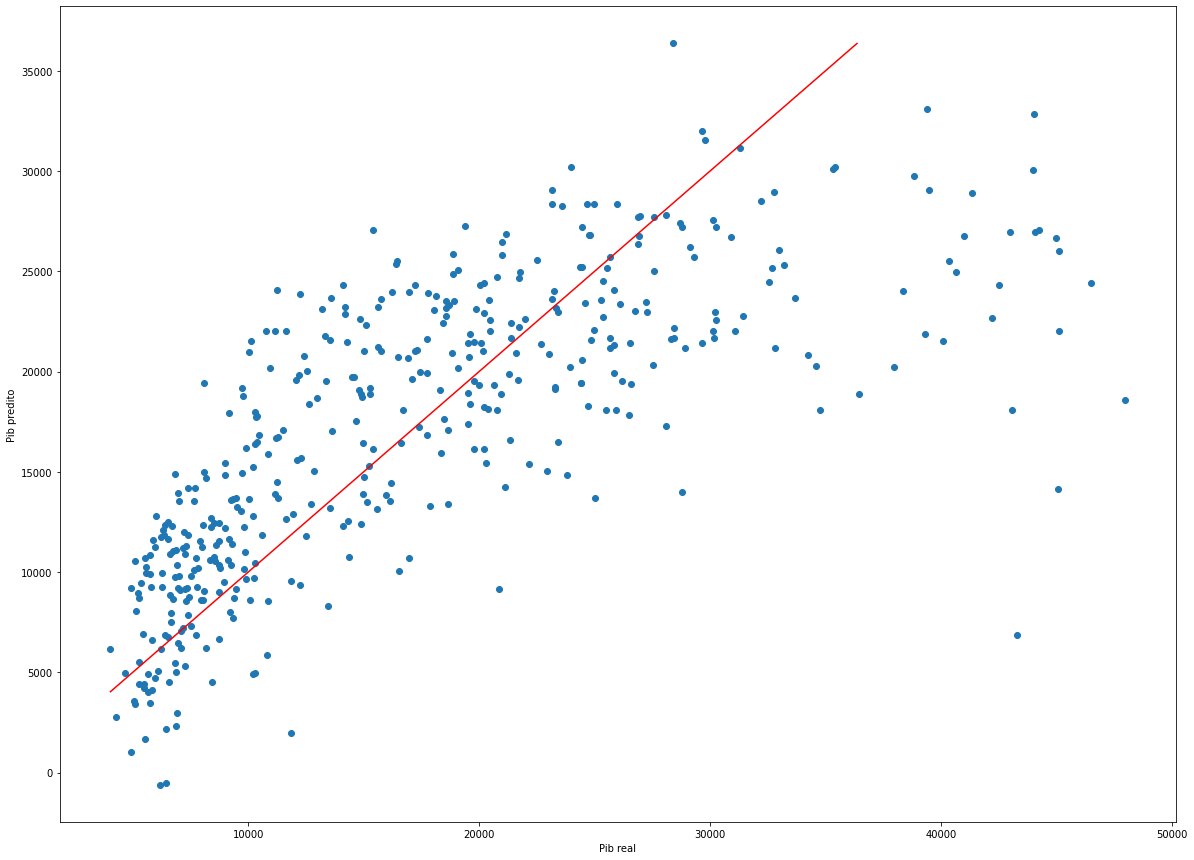

In [12]:
# Plotando o gráfico para confrontar os valores preditos com os valores reais
plt.figure(figsize=(20, 15))
plt.scatter(y_test, Y_prev)
range = [y_test.min(), Y_prev.max()]
plt.plot(range, range, 'red')
plt.xlabel('Pib real')
plt.ylabel('Pib predito')
plt.show()

In [13]:
print('R2', r2_score(y_test, Y_prev))

R2 0.5462345616632546


#### Erro Médio Absoluto
Soma de todos os erros divididos pelo número de pontos

![MAE](./src/MAE.jpg)


In [14]:
print(f'MAE {mean_absolute_error(y_test, Y_prev)}')

MAE 4929.264103773501


#### Erro Médio Quadrático
Baseado no erro médio absoluto mas aplicado o quadrado aos erros

![MSE](./src/MSE.png)

In [15]:
print(f'MSE {mean_squared_error(y_test, Y_prev)}')

MSE 46486964.359343685


#### Raiz do Erro Médio Quadrático
Baseado no erro médio quadrático, mas retirando-se sua raiz quadrada

![RMSE](./src/RMSE.png)

In [16]:
mse = mean_squared_error(y_test, Y_prev)
print(f'RMSE {math.sqrt(mse)}')

RMSE 6818.134961948442


## Conclusão

Os resultados obtidos não foram tao satisfatórios, o valor do score e o valor do erro médio mostram que existem erros com os modelo que ainda pode ser melhorado.